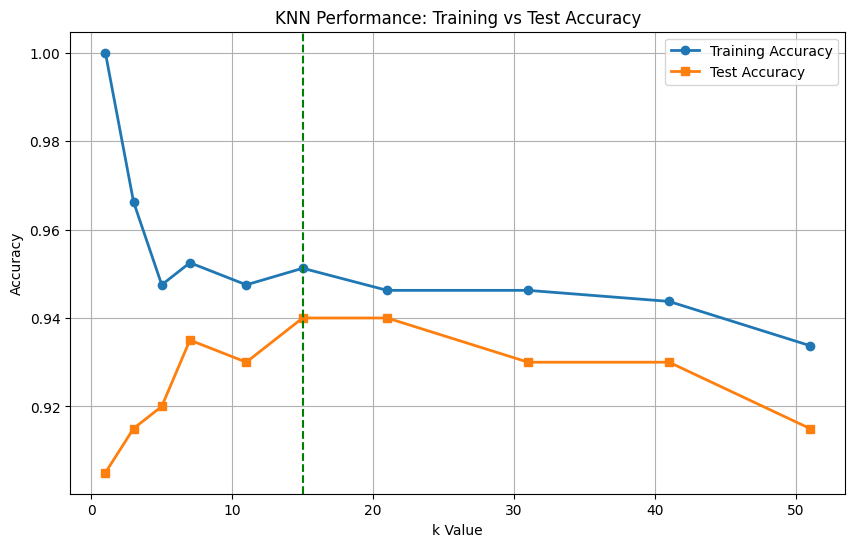


Analysis of Results:
Optimal k value: 15
Best test accuracy: 0.9400

Overfitting indicators:
k=1 training accuracy: 1.0000
k=1 test accuracy: 0.9050
k=1 gap: 0.0950

Underfitting indicators:
k=51 training accuracy: 0.9337
k=51 test accuracy: 0.9150


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
def generate_data(n_samples=1000):
    X, y = make_classification(
        n_samples=n_samples,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=42,
        n_clusters_per_class=1
    )
    return X, y

# Function to evaluate KNN for different k values
def evaluate_knn(X_train, X_test, y_train, y_test, k_values):
    train_scores = []
    test_scores = []
    
    for k in k_values:
        # Create and train model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Get predictions and calculate scores
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)
        
        train_scores.append(accuracy_score(y_train, train_pred))
        test_scores.append(accuracy_score(y_test, test_pred))
    
    return train_scores, test_scores

# Generate and split data
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define k values to test
k_values = [1, 3, 5, 7, 11, 15, 21, 31, 41, 51]

# Evaluate models
train_scores, test_scores = evaluate_knn(X_train, X_test, y_train, y_test, k_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy', linewidth=2)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('KNN Performance: Training vs Test Accuracy')
plt.legend()
plt.grid(True)

# Add vertical lines to mark regions
optimal_k_idx = np.argmax(test_scores)
plt.axvline(x=k_values[optimal_k_idx], color='g', linestyle='--', 
            label=f'Optimal k={k_values[optimal_k_idx]}')

# Add annotations for overfitting and underfitting regions
plt.annotate('Overfitting Region', xy=(2, 0.85), xytext=(2, 0.75),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Underfitting Region', xy=(45, 0.85), xytext=(35, 0.75),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Print analysis
print("\nAnalysis of Results:")
print(f"Optimal k value: {k_values[optimal_k_idx]}")
print(f"Best test accuracy: {test_scores[optimal_k_idx]:.4f}")
print("\nOverfitting indicators:")
print(f"k=1 training accuracy: {train_scores[0]:.4f}")
print(f"k=1 test accuracy: {test_scores[0]:.4f}")
print(f"k=1 gap: {train_scores[0] - test_scores[0]:.4f}")
print("\nUnderfitting indicators:")
print(f"k=51 training accuracy: {train_scores[-1]:.4f}")
print(f"k=51 test accuracy: {test_scores[-1]:.4f}")

In [ ]:
# pip install ipywidgets

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Button, VBox, HBox, Output, FloatSlider, IntSlider
import ipywidgets as widgets
from IPython.display import display, clear_output

# ----------------------------
# 1. Prepare a simple dataset
# ----------------------------

# For reproducibility
np.random.seed(42)

# Our independent variable: "Size" (in 1000 square feet)
# We'll use 20 data points from 0 to 10
x = np.linspace(0, 10, 20)

# Dependent variable: "Price" (in $1000)
# Assume the true relationship is: Price = 2 * Size + 1, with some noise
true_theta1 = 2    # True slope
true_theta0 = 1    # True intercept
noise = np.random.normal(0, 1, len(x))
y = true_theta1 * x + true_theta0 + noise

# ----------------------------
# 2. Initialize Parameters
# ----------------------------

# We denote our parameters as:
#   theta1: slope (analogous to m)
#   theta0: intercept (analogous to b)
# We start with initial guesses:
theta1 = 0.0   # initial slope guess
theta0 = 0.0   # initial intercept guess

# Learning rate (alpha) determines step size. 
# A moderate value is chosen so that the algorithm converges smoothly.
alpha = 0.05

# To track the progress:
iteration = 0
cost_history = []  # To store the cost at each iteration
theta1_history = [theta1]
theta0_history = [theta0]

# ----------------------------
# 3. Define Helper Functions
# ----------------------------

def compute_cost(theta0, theta1, x, y):
    """
    Compute the Mean Squared Error cost function:
        E(theta0, theta1) = (1/(2*m)) * sum((predictions - y)^2)
    where m is the number of data points.
    """
    m = len(x)
    predictions = theta1 * x + theta0
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent_step(theta0, theta1, x, y, alpha):
    """
    Perform one iteration of gradient descent.
    
    Returns the updated parameters as well as the computed gradients.
    
    Derivations:
      - For theta1 (slope):
          dE/d(theta1) = (1/m) * sum((theta1*x + theta0 - y) * x)
      - For theta0 (intercept):
          dE/d(theta0) = (1/m) * sum(theta1*x + theta0 - y)
    """
    m = len(x)
    predictions = theta1 * x + theta0
    errors = predictions - y
    dtheta1 = (1/m) * np.sum(errors * x)
    dtheta0 = (1/m) * np.sum(errors)
    
    # Update parameters: subtract a fraction (alpha) of the gradient.
    theta1_new = theta1 - alpha * dtheta1
    theta0_new = theta0 - alpha * dtheta0
    
    return theta0_new, theta1_new, dtheta0, dtheta1

def update_plots(theta0, theta1, iteration, cost_history):
    """
    Update the two plots:
      - Top plot: Shows data points and current regression line.
      - Bottom plot: Shows cost vs. iteration number (convergence curve).
    """
    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Top plot: Data and regression line
    ax1.scatter(x, y, color='blue', label="Data Points")
    reg_line = theta1 * x + theta0
    ax1.plot(x, reg_line, color='red', label=f"Line: y = {theta1:.2f}x + {theta0:.2f}")
    ax1.set_title(f"Iteration {iteration}: Regression Line")
    ax1.set_xlabel("Size (1000 sq ft)")
    ax1.set_ylabel("Price ($1000)")
    ax1.legend()
    
    # Bottom plot: Cost function vs. Iterations
    ax2.plot(range(1, iteration+1), cost_history, marker='o', color='green')
    ax2.set_title("Cost Function vs. Iterations")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Cost")
    
    plt.tight_layout()
    plt.show()

# ----------------------------
# 4. Create the Interactive Button
# ----------------------------

# Create an output widget for displaying the plots
out = Output()

# Create a button widget that triggers one iteration of gradient descent
button = Button(description="Perform Iteration", button_style='success')

def on_button_click(b):
    global theta0, theta1, iteration, cost_history, theta0_history, theta1_history
    
    # Perform one gradient descent iteration
    theta0, theta1, grad_theta0, grad_theta1 = gradient_descent_step(theta0, theta1, x, y, alpha)
    
    # Increase iteration count and record the history
    iteration += 1
    current_cost = compute_cost(theta0, theta1, x, y)
    cost_history.append(current_cost)
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    
    # Print out the details for this iteration
    print(f"Iteration: {iteration}")
    print(f"theta1 (slope): {theta1:.4f}, theta0 (intercept): {theta0:.4f}")
    print(f"Gradient for theta1: {grad_theta1:.4f}, Gradient for theta0: {grad_theta0:.4f}")
    print(f"Cost: {current_cost:.4f}\n")
    
    # Update the plots
    with out:
        update_plots(theta0, theta1, iteration, cost_history)
    
    # Optional stopping criteria: if cost change is very small, disable the button.
    if iteration > 1 and abs(cost_history[-2] - current_cost) < 1e-5:
        print("Convergence reached: changes are minimal. Stopping iterations.")
        button.disabled = True

# Set the button's on-click event
button.on_click(on_button_click)

# Display the button and output widget together
display(VBox([button, out]))

# ----------------------------
# 5. Documentation & Rationale Summary
# ----------------------------
#
# Data:
#   - We simulate a dataset with an underlying relationship: Price = 2 * Size + 1.
#   - Noise is added to mimic real-world variability.
#
# Parameters:
#   - We initialize our parameters (theta1 for slope and theta0 for intercept) to 0.
#   - The learning rate (alpha = 0.05) is chosen to ensure smooth convergence.
#
# Gradient Descent:
#   - In each iteration, we compute the predicted values and errors.
#   - We calculate the partial derivatives (gradients) with respect to theta1 and theta0.
#     • For theta1, the derivative is (1/m)*Σ[(prediction - y) * x].
#     • For theta0, it is (1/m)*Σ(prediction - y).
#   - We subtract a fraction (learning rate times gradient) from the current parameters,
#     because the gradient indicates the direction of steepest ascent; moving opposite
#     to it minimizes the cost.
#
# Visualization:
#   - The top plot shows how the regression line fits the data as parameters update.
#   - The bottom plot tracks the cost function's value over iterations, visualizing convergence.
#
# Stopping:
#   - The iteration button continues to run until the cost change becomes negligibly small,
#     indicating convergence. At that point, the button is disabled.
#
# You can click the "Perform Iteration" button to see each gradient descent iteration.
# Once the algorithm converges (or if you reach a satisfactory cost), the iterations will stop.
# After convergence, you can close the program (or stop interacting).
